<a href="https://colab.research.google.com/github/ananthojusankethkumar/Food_delivery_time_prediction/blob/main/Hotel_booking_prediction_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
df=pd.read_csv(r"/content/hotel_bookings.csv")

In [118]:
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [119]:
df.shape


(119390, 32)

In [120]:
df.isna()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119386,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119387,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119388,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [121]:
df.isna().sum()


,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [122]:
def data_clean(df):
  df.fillna(0, inplace=True)
  print(df.isna().sum())

In [123]:
data_clean(df)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [124]:
list=["children","babies","adults"]
for i in list:
  print(f"{i} has unique values as {df[i].unique()}")

children has unique values as [ 0.  1.  2. 10.  3.]
babies has unique values as [ 0  1  2 10  9]
adults has unique values as [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]


In [125]:
filtered_data = (df["children"] == 0) & (df["adults"] == 0) & (df["babies"] == 0)

final_data = df[~filtered_data]

In [126]:
final_data.shape

(119210, 32)

In [127]:
country_wise_data = final_data[final_data["is_canceled"] == 0]["country"].value_counts().reset_index()
country_wise_data.columns = ["Country", "No.of Guests"]
print(country_wise_data)



    Country  No.of Guests
0       PRT         20977
1       GBR          9668
2       FRA          8468
3       ESP          6383
4       DEU          6067
..      ...           ...
161     KIR             1
162     ATF             1
163     TJK             1
164     SLE             1
165     FRO             1

[166 rows x 2 columns]


In [128]:
import plotly.express as px

In [129]:
map_guests = px.choropleth(country_wise_data, locations = country_wise_data["Country"],
                               color = country_wise_data["No.of Guests"],
                               hover_name = country_wise_data["Country"],
                               title = "Home Country of the guests"
                               )
map_guests.show()


In [130]:
final_data["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [131]:
df["adr"]

,adr
0,0.00
1,0.00
2,75.00
3,75.00
4,98.00
...,...
119385,96.14
119386,225.43
119387,157.71
119388,104.40


In [132]:
data = final_data[final_data["is_canceled"] == 0]

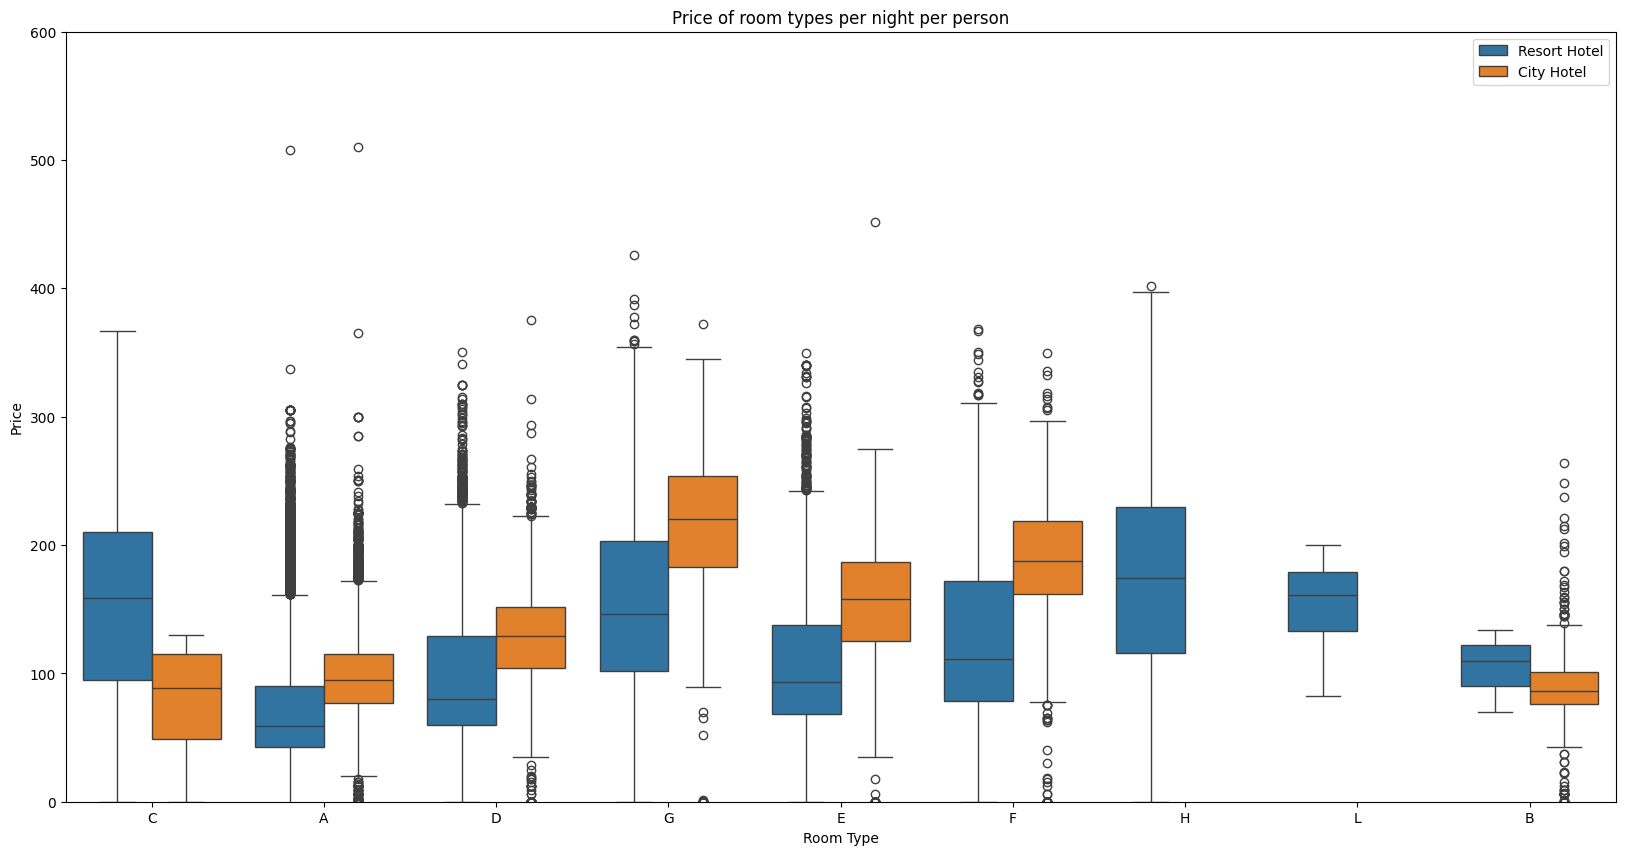

In [133]:
plt.figure(figsize = (20,10))
sns.boxplot( x = "reserved_room_type", y = "adr", hue = "hotel", data = data)

plt.title("Price of room types per night per person")
plt.xlabel("Room Type")
plt.ylabel("Price")
plt.legend(loc = "upper right")
plt.ylim(0, 600)
plt.show()

In [134]:
final_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [135]:
final_data["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [136]:
data_resort = final_data[(final_data["hotel"] == "Resort Hotel") & (final_data["is_canceled"] == 0)]
data_city =  final_data[(final_data["hotel"] == "City Hotel") & (final_data["is_canceled"] == 0)]

In [137]:
#For the resort hotels  #ADR = Average daily rate (How many people came daily) but here we are taking per month

resort_hotel=data_resort.groupby("arrival_date_month")["adr"].mean().reset_index()

In [138]:
#For the City hotels

city_hotel=data_city.groupby("arrival_date_month")["adr"].mean().reset_index()


In [139]:
final = resort_hotel.merge(city_hotel, on = "arrival_date_month")
final_columns = ["month","price_for_resort_hotel""price_for_city_hotel"]

In [140]:
print(final)

   arrival_date_month       adr_x       adr_y
0               April   75.867816  111.962267
1              August  181.205892  118.674598
2            December   68.410104   88.401855
3            February   54.147478   86.520062
4             January   48.761125   82.330983
5                July  150.122528  115.818019
6                June  107.974850  117.874360
7               March   57.056838   90.658533
8                 May   76.657558  120.669827
9            November   48.706289   86.946592
10            October   61.775449  102.004672
11          September   96.416860  112.776582


In [141]:
#sorting the month

from calendar import month_name

def sort_month(df,colname):
  month_dict = { j:i for i,j in enumerate(month_name)} #dictionary comprehension
  df["month_num"] = df[colname].apply(lambda x: month_dict[x])
  return df.sort_values(by = "month_num").reset_index().drop(["index", "month_num"],axis = 1)

In [142]:
test = sort_month(final, "arrival_date_month")
display(test)

,arrival_date_month,adr_x,adr_y
0,January,48.761125,82.330983
1,February,54.147478,86.520062
2,March,57.056838,90.658533
3,April,75.867816,111.962267
4,May,76.657558,120.669827
5,June,107.974850,117.874360
6,July,150.122528,115.818019
7,August,181.205892,118.674598
8,September,96.416860,112.776582
9,October,61.775449,102.004672


<Axes: xlabel='arrival_date_month'>

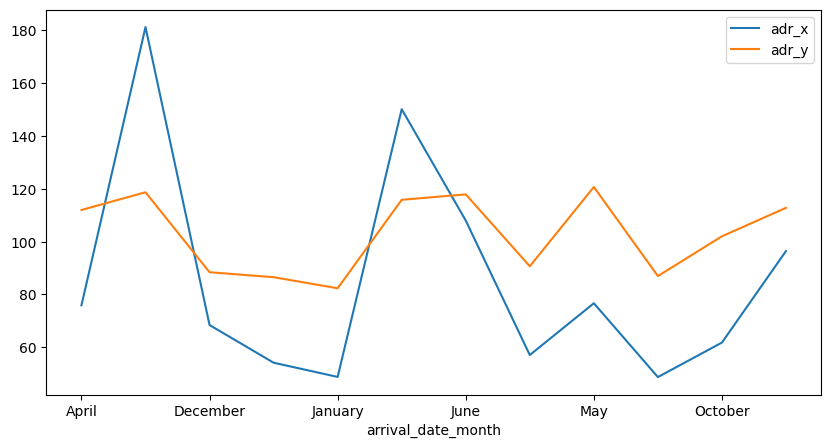

In [143]:
final.plot(kind = "line", x = "arrival_date_month", y = ["adr_x", "adr_y"], figsize = (10,5))

In [144]:
# Analysing Which months the customers are high

data_resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [145]:
rush_resort=data_resort["arrival_date_month"].value_counts().reset_index() #Rush months for resort hotels
rush_resort.columns=["month","no_of_guests"]

print(rush_resort)

        month  no_of_guests
0      August          3257
1        July          3137
2     October          2575
3       March          2571
4       April          2550
5         May          2535
6    February          2308
7   September          2102
8        June          2037
9    December          2014
10   November          1975
11    January          1866


In [146]:
rush_city=data_city["arrival_date_month"].value_counts().reset_index()  # Rush months for City hotels
rush_city.columns=["month","no_of_guests"]

print(rush_city)

        month  no_of_guests
0      August          5367
1        July          4770
2         May          4568
3        June          4358
4     October          4326
5   September          4283
6       March          4049
7       April          4010
8    February          3051
9    November          2676
10   December          2377
11    January          2249


In [147]:
# Merging Both hotels Rush months

final_rush=rush_resort.merge(rush_city, on = "month")
final_rush.columns=["month","no_of_guests_for_resort_hotel","no_of_guests_for_city_hotel"]

print(final_rush)


        month  no_of_guests_for_resort_hotel  no_of_guests_for_city_hotel
0      August                           3257                         5367
1        July                           3137                         4770
2     October                           2575                         4326
3       March                           2571                         4049
4       April                           2550                         4010
5         May                           2535                         4568
6    February                           2308                         3051
7   September                           2102                         4283
8        June                           2037                         4358
9    December                           2014                         2377
10   November                           1975                         2676
11    January                           1866                         2249


In [148]:
final_rush=sort_month(final_rush,"month")
print(final_rush)

        month  no_of_guests_for_resort_hotel  no_of_guests_for_city_hotel
0     January                           1866                         2249
1    February                           2308                         3051
2       March                           2571                         4049
3       April                           2550                         4010
4         May                           2535                         4568
5        June                           2037                         4358
6        July                           3137                         4770
7      August                           3257                         5367
8   September                           2102                         4283
9     October                           2575                         4326
10   November                           1975                         2676
11   December                           2014                         2377


<Axes: xlabel='month'>

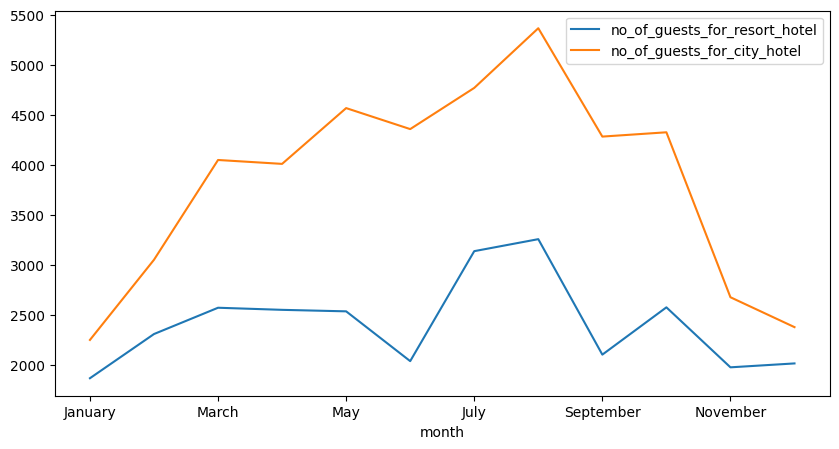

In [149]:
#plotting the line plot

final_rush.plot(kind = "line", x = "month", y = ["no_of_guests_for_resort_hotel", "no_of_guests_for_city_hotel"], figsize = (10,5))

In [150]:
#final_data attribute is the cleaned data

final_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [151]:
filter_condition = final_data["is_canceled"] == 0
clean_data = final_data[filter_condition]


In [152]:
clean_data.head()  #This is cleaned data we have gave final_data to clean_data


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [153]:
clean_data["total_nights"] = clean_data["stays_in_weekend_nights"] + clean_data["stays_in_week_nights"] #just a warning ignore it

In [154]:
stay = clean_data.groupby(["total_nights","hotel"]).agg(["count"]).reset_index()

stay = stay.iloc[:, 0:3]

print(stay)

   total_nights         hotel is_canceled
                                    count
0             0    City Hotel         251
1             0  Resort Hotel         371
2             1    City Hotel        9155
3             1  Resort Hotel        6579
4             2    City Hotel       10983
..          ...           ...         ...
57           46  Resort Hotel           1
58           48    City Hotel           1
59           56  Resort Hotel           1
60           60  Resort Hotel           1
61           69  Resort Hotel           1

[62 rows x 3 columns]


In [155]:
stay = stay.rename(columns = {"is_canceled":"Number of stays"})

In [156]:
print(stay)

   total_nights         hotel Number of stays
                                        count
0             0    City Hotel             251
1             0  Resort Hotel             371
2             1    City Hotel            9155
3             1  Resort Hotel            6579
4             2    City Hotel           10983
..          ...           ...             ...
57           46  Resort Hotel               1
58           48    City Hotel               1
59           56  Resort Hotel               1
60           60  Resort Hotel               1
61           69  Resort Hotel               1

[62 rows x 3 columns]


<Axes: xlabel='total_nights', ylabel="('Number of stays', 'count')">

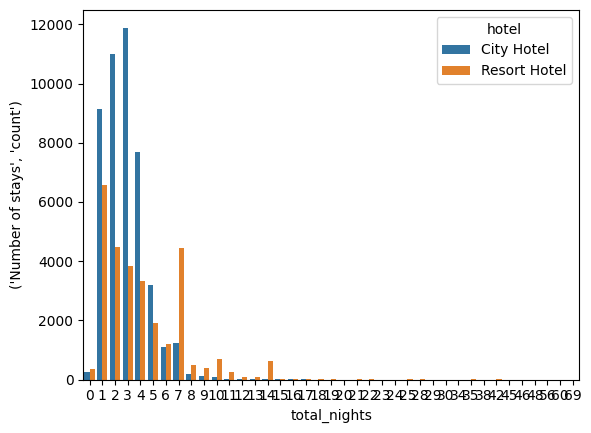

In [157]:
sns.barplot(x = "total_nights", y = ("Number of stays", "count"), hue = "hotel", hue_order = ["City Hotel","Resort Hotel"] , data = stay)

In [158]:
numeric_data = final_data.select_dtypes(include=np.number)
correlation_matrix = numeric_data.corr()
display(correlation_matrix)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.292876,0.016622,0.008315,-0.005948,-0.001323,0.025542,0.058182,0.004851,-0.032569,-0.083745,0.110139,-0.057365,-0.144832,-0.046770,-0.083594,0.054301,0.046492,-0.195701,-0.234877
lead_time,0.292876,1.000000,0.040334,0.127046,0.002306,0.085985,0.166892,0.117575,-0.037878,-0.021003,-0.123209,0.086025,-0.073599,0.002230,-0.013114,-0.085854,0.170008,-0.065018,-0.116624,-0.095949
arrival_date_year,0.016622,0.040334,1.000000,-0.540373,-0.000121,0.021694,0.031203,0.030266,0.054710,-0.013192,0.010281,-0.119905,0.029234,0.031416,0.056438,0.033682,-0.056348,0.198429,-0.013812,0.108610
arrival_date_week_number,0.008315,0.127046,-0.540373,1.000000,0.066572,0.018629,0.016047,0.026567,0.005556,0.010417,-0.031125,0.035493,-0.021009,0.006311,-0.018225,-0.032912,0.022677,0.076281,0.001980,0.026202
arrival_date_day_of_month,-0.005948,0.002306,-0.000121,0.066572,1.000000,-0.016225,-0.028362,-0.001754,0.014550,-0.000235,-0.006471,-0.027027,-0.000306,0.011266,0.000159,0.003667,0.022532,0.030291,0.008569,0.003026
stays_in_weekend_nights,-0.001323,0.085985,0.021694,0.018629,-0.016225,1.000000,0.494175,0.094759,0.046135,0.018607,-0.086009,-0.012769,-0.042859,0.050191,0.162411,-0.080783,-0.054399,0.050670,-0.018520,0.073124
stays_in_week_nights,0.025542,0.166892,0.031203,0.016047,-0.028362,0.494175,1.000000,0.096214,0.044652,0.020373,-0.095302,-0.013976,-0.048873,0.080018,0.196777,-0.044437,-0.002026,0.066847,-0.024933,0.068738
adults,0.058182,0.117575,0.030266,0.026567,-0.001754,0.094759,0.096214,1.000000,0.029409,0.017890,-0.140973,-0.007070,-0.108856,-0.041472,0.023370,-0.166182,-0.008365,0.224253,0.014438,0.123353
children,0.004851,-0.037878,0.054710,0.005556,0.014550,0.046135,0.044652,0.029409,1.000000,0.023999,-0.032475,-0.024755,-0.021078,0.051000,0.050461,-0.042554,-0.033293,0.325057,0.056247,0.081747
babies,-0.032569,-0.021003,-0.013192,0.010417,-0.000235,0.018607,0.020373,0.017890,0.023999,1.000000,-0.008813,-0.007509,-0.006552,0.085605,0.030235,-0.009426,-0.010627,0.029043,0.037389,0.097939


In [159]:
correlation_matrix["is_canceled"][1:]

,is_canceled
lead_time,0.292876
arrival_date_year,0.016622
arrival_date_week_number,0.008315
arrival_date_day_of_month,-0.005948
stays_in_weekend_nights,-0.001323
stays_in_week_nights,0.025542
adults,0.058182
children,0.004851
babies,-0.032569
is_repeated_guest,-0.083745


In [160]:
correlation_matrix["is_canceled"].abs().sort_values(ascending = False)

,is_canceled
is_canceled,1.000000
lead_time,0.292876
total_of_special_requests,0.234877
required_car_parking_spaces,0.195701
booking_changes,0.144832
previous_cancellations,0.110139
is_repeated_guest,0.083745
company,0.083594
adults,0.058182
previous_bookings_not_canceled,0.057365


In [161]:
list_not = ["days_in_waiting_list","arrival_date_year"]

In [162]:
num_features = [col for col in final_data.columns if final_data[col].dtype != "O" and col not in list_not]   #List Comprehension  # if not equal to O then numerical if equla then categorical

In [163]:
print(num_features)

['is_canceled', 'lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [164]:
#Selecting Important categorical features
final_data["reservation_status"].value_counts()

,count
reservation_status,
Check-Out,75011
Canceled,42993
No-Show,1206


In [165]:
cat_not = ["reservation_status", "country","booking_changes","assigned_room_type","days_in_waiting_list"]

In [166]:
cat_features = [col for col in final_data.columns if final_data[col].dtype == "O" and col not in cat_not]


In [167]:
print(cat_features)

['hotel', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type', 'reservation_status_date']


In [168]:
print(num_features)

['is_canceled', 'lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [169]:
final_data[cat_features]

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,7/1/2015
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,7/1/2015
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,7/2/2015
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,7/2/2015
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,7/3/2015
...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,Offline TA/TO,TA/TO,A,No Deposit,Transient,9/6/2017
119386,City Hotel,August,BB,Online TA,TA/TO,E,No Deposit,Transient,9/7/2017
119387,City Hotel,August,BB,Online TA,TA/TO,D,No Deposit,Transient,9/7/2017
119388,City Hotel,August,BB,Online TA,TA/TO,A,No Deposit,Transient,9/7/2017


In [170]:
final_data[num_features]

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,27,1,0,0,2,0.0,0,0,0,0,3,0.0,0.0,0.00,0,0
1,0,737,27,1,0,0,2,0.0,0,0,0,0,4,0.0,0.0,0.00,0,0
2,0,7,27,1,0,1,1,0.0,0,0,0,0,0,0.0,0.0,75.00,0,0
3,0,13,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0.0,75.00,0,0
4,0,14,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0.0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,35,30,2,5,2,0.0,0,0,0,0,0,394.0,0.0,96.14,0,0
119386,0,102,35,31,2,5,3,0.0,0,0,0,0,0,9.0,0.0,225.43,0,2
119387,0,34,35,31,2,5,2,0.0,0,0,0,0,0,9.0,0.0,157.71,0,4
119388,0,109,35,31,2,5,2,0.0,0,0,0,0,0,89.0,0.0,104.40,0,0


In [171]:
data_cat = final_data[cat_features]

In [172]:
print(data_cat.head())

          hotel arrival_date_month meal market_segment distribution_channel  \
0  Resort Hotel               July   BB         Direct               Direct   
1  Resort Hotel               July   BB         Direct               Direct   
2  Resort Hotel               July   BB         Direct               Direct   
3  Resort Hotel               July   BB      Corporate            Corporate   
4  Resort Hotel               July   BB      Online TA                TA/TO   

  reserved_room_type deposit_type customer_type reservation_status_date  
0                  C   No Deposit     Transient                7/1/2015  
1                  C   No Deposit     Transient                7/1/2015  
2                  A   No Deposit     Transient                7/2/2015  
3                  A   No Deposit     Transient                7/2/2015  
4                  A   No Deposit     Transient                7/3/2015  


In [173]:
import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore")

data_cat["reservation_status_date"] = pd.to_datetime(data_cat["reservation_status_date"])

In [174]:
data_cat["year"] = data_cat["reservation_status_date"].dt.year
data_cat["month"] = data_cat["reservation_status_date"].dt.month
data_cat["day"] = data_cat["reservation_status_date"].dt.day

In [175]:
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date,year,month,day
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01,2015,7,1
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01,2015,7,1
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02,2015,7,2
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02,2015,7,2
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03,2015,7,3


In [176]:
# This line caused an error because the column was already dropped
#data_cat.drop("reservation_status_date", axis = 1, inplace = True)

In [177]:
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date,year,month,day
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01,2015,7,1
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01,2015,7,1
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02,2015,7,2
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02,2015,7,2
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03,2015,7,3


In [178]:
# Mean Encoding for categoricaldata

data_cat.columns

Index(['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type', 'reservation_status_date', 'year', 'month', 'day'],
      dtype='object')

In [179]:
data_cat["cancellation"] = final_data["is_canceled"]

In [180]:
print(data_cat.head())

          hotel arrival_date_month meal market_segment distribution_channel  \
0  Resort Hotel               July   BB         Direct               Direct   
1  Resort Hotel               July   BB         Direct               Direct   
2  Resort Hotel               July   BB         Direct               Direct   
3  Resort Hotel               July   BB      Corporate            Corporate   
4  Resort Hotel               July   BB      Online TA                TA/TO   

  reserved_room_type deposit_type customer_type reservation_status_date  year  \
0                  C   No Deposit     Transient              2015-07-01  2015   
1                  C   No Deposit     Transient              2015-07-01  2015   
2                  A   No Deposit     Transient              2015-07-02  2015   
3                  A   No Deposit     Transient              2015-07-02  2015   
4                  A   No Deposit     Transient              2015-07-03  2015   

   month  day  cancellation  
0      7

In [181]:
def mean_encode(df , col , mean_col ):
  df_dict = df.groupby([col])[mean_col].mean().to_dict()
  df[col] = df[col].map(df_dict)
  return df

for col in data_cat.columns[0:8]:
  data_cat = mean_encode(data_cat, col, "cancellation")

In [182]:
print(data_cat)

           hotel  arrival_date_month      meal  market_segment  \
0       0.277674            0.374644  0.374106        0.153712   
1       0.277674            0.374644  0.374106        0.153712   
2       0.277674            0.374644  0.374106        0.153712   
3       0.277674            0.374644  0.374106        0.187618   
4       0.277674            0.374644  0.374106        0.367590   
...          ...                 ...       ...             ...   
119385  0.417859            0.377823  0.374106        0.343313   
119386  0.417859            0.377823  0.374106        0.367590   
119387  0.417859            0.377823  0.374106        0.367590   
119388  0.417859            0.377823  0.374106        0.367590   
119389  0.417859            0.377823  0.344653        0.367590   

        distribution_channel  reserved_room_type  deposit_type  customer_type  \
0                   0.174868            0.330827       0.28402       0.407864   
1                   0.174868            0.330

In [183]:
data_cat.drop(["cancellation"], axis = 1, inplace = True)

In [184]:
print(data_cat)

           hotel  arrival_date_month      meal  market_segment  \
0       0.277674            0.374644  0.374106        0.153712   
1       0.277674            0.374644  0.374106        0.153712   
2       0.277674            0.374644  0.374106        0.153712   
3       0.277674            0.374644  0.374106        0.187618   
4       0.277674            0.374644  0.374106        0.367590   
...          ...                 ...       ...             ...   
119385  0.417859            0.377823  0.374106        0.343313   
119386  0.417859            0.377823  0.374106        0.367590   
119387  0.417859            0.377823  0.374106        0.367590   
119388  0.417859            0.377823  0.374106        0.367590   
119389  0.417859            0.377823  0.344653        0.367590   

        distribution_channel  reserved_room_type  deposit_type  customer_type  \
0                   0.174868            0.330827       0.28402       0.407864   
1                   0.174868            0.330

In [185]:
# Preparing our data

num_data = final_data[num_features] # numerical data

cat_data = data_cat #categorical data

dataframe = pd.concat([num_data, cat_data], axis = 1)

In [186]:
print(dataframe)

        is_canceled  lead_time  arrival_date_week_number  \
0                 0        342                        27   
1                 0        737                        27   
2                 0          7                        27   
3                 0         13                        27   
4                 0         14                        27   
...             ...        ...                       ...   
119385            0         23                        35   
119386            0        102                        35   
119387            0         34                        35   
119388            0        109                        35   
119389            0        205                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                              

In [187]:
#Handle the outliers

dataframe.describe()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date,year,month,day
count,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,...,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210,119210.000000,119210.000000,119210.000000
mean,0.370766,104.109227,27.163376,15.798717,0.927053,2.499195,1.859206,0.104043,0.007961,0.031499,...,0.370766,0.370766,0.370766,0.370766,0.370766,0.370766,2016-07-29 22:20:25.709252864,2016.093549,6.333630,15.666278
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.244654,0.122253,0.174868,0.292683,0.222222,0.101045,2014-10-17 00:00:00,2014.000000,1.000000,1.000000
25%,0.000000,18.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,0.374106,0.343313,0.410598,0.330827,0.284020,0.407864,2016-02-01 00:00:00,2016.000000,3.000000,8.000000
50%,0.000000,69.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,...,0.374106,0.367590,0.410598,0.391567,0.284020,0.407864,2016-08-07 00:00:00,2016.000000,6.000000,16.000000
75%,1.000000,161.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,...,0.374106,0.367590,0.410598,0.391567,0.284020,0.407864,2017-02-08 00:00:00,2017.000000,9.000000,23.000000
max,1.000000,737.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,...,0.598997,1.000000,0.800000,0.407654,0.993624,0.407864,2017-09-14 00:00:00,2017.000000,12.000000,31.000000
std,0.483012,106.875450,13.601107,8.781070,0.995117,1.897106,0.575186,0.398836,0.097509,0.174663,...,0.024433,0.128967,0.085574,0.035148,0.232585,0.065988,NaN,0.715306,3.345818,8.778871


<Axes: xlabel='lead_time', ylabel='Density'>

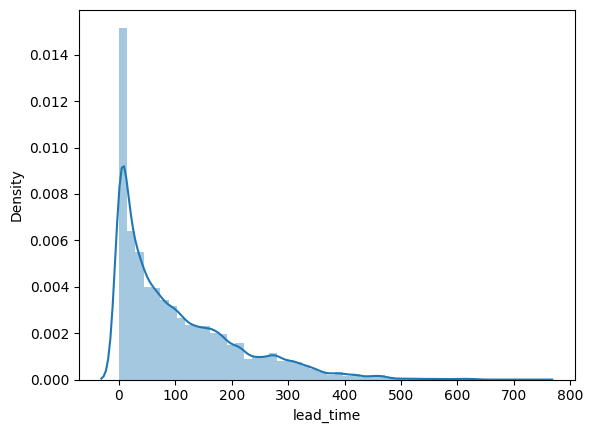

In [188]:
sns.distplot(dataframe["lead_time"]) #using seaborn


In [189]:
def handle_outlier(col):
  dataframe[col] = np.log1p(dataframe[col])

In [190]:
handle_outlier("lead_time")

<Axes: xlabel='lead_time', ylabel='Density'>

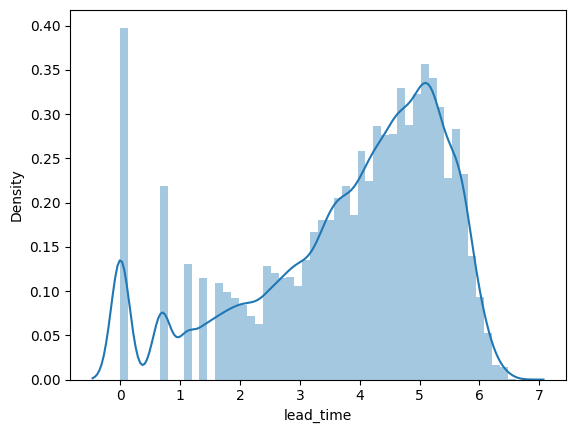

In [191]:
sns.distplot(dataframe["lead_time"].dropna())

<Axes: xlabel='adr', ylabel='Density'>

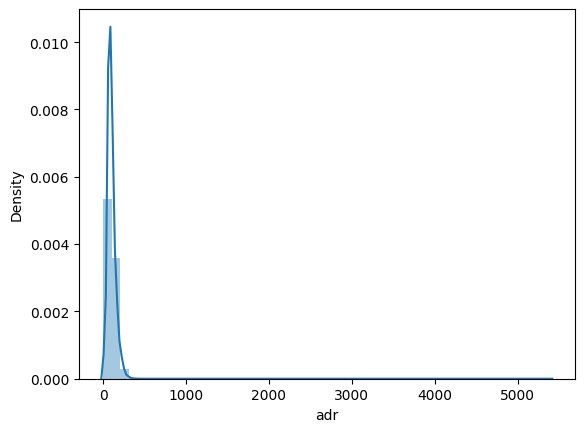

In [192]:
sns.distplot(dataframe["adr"])

In [193]:
handle_outlier("adr")

In [194]:
dataframe.isnull().sum()

,0
is_canceled,0
lead_time,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0
children,0
babies,0
is_repeated_guest,0


In [195]:
dataframe.dropna(inplace = True)

In [196]:
print(dataframe)

        is_canceled  lead_time  arrival_date_week_number  \
0                 0   5.837730                        27   
1                 0   6.603944                        27   
2                 0   2.079442                        27   
3                 0   2.639057                        27   
4                 0   2.708050                        27   
...             ...        ...                       ...   
119385            0   3.178054                        35   
119386            0   4.634729                        35   
119387            0   3.555348                        35   
119388            0   4.700480                        35   
119389            0   5.327876                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                              

In [197]:
#Feature Importance

#Seperating the Dependent and Independent variable

y = dataframe["is_canceled"] #Dependent Variable

x = dataframe.drop("is_canceled", axis = 1) #Independent Variable



In [198]:
x.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date,year,month,day
0,5.837730,27,1,0,0,2,0.0,0,0,0,...,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015-07-01,2015,7,1
1,6.603944,27,1,0,0,2,0.0,0,0,0,...,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015-07-01,2015,7,1
2,2.079442,27,1,0,1,1,0.0,0,0,0,...,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864,2015-07-02,2015,7,2
3,2.639057,27,1,0,1,1,0.0,0,0,0,...,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864,2015-07-02,2015,7,2
4,2.708050,27,1,0,2,2,0.0,0,0,0,...,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2015-07-03,2015,7,3


In [199]:
x.columns

Index(['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'adr', 'required_car_parking_spaces', 'total_of_special_requests',
       'hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type', 'reservation_status_date', 'year', 'month', 'day'],
      dtype='object')

In [200]:
#Filtering out the important features in the X

import sklearn
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [201]:
Feature_sel_model = SelectFromModel(Lasso(alpha = 0.005, random_state = 0))

In [202]:
# Drop the datetime column before feature selection
x = x.drop("reservation_status_date", axis=1)
Feature_sel_model = SelectFromModel(Lasso(alpha = 0.005, random_state = 0))
Feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [203]:
Feature_sel_model.get_support()

array([ True,  True, False, False, False,  True,  True, False, False,
        True, False,  True, False,  True,  True,  True,  True, False,
       False, False, False, False, False,  True, False,  True,  True,
        True])

In [204]:
cols = x.columns
print(cols)

Index(['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'adr', 'required_car_parking_spaces', 'total_of_special_requests',
       'hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type', 'year', 'month', 'day'],
      dtype='object')


In [205]:
selected_feature = cols[Feature_sel_model.get_support()]
print(selected_feature)

Index(['lead_time', 'arrival_date_week_number', 'adults', 'children',
       'previous_cancellations', 'booking_changes', 'company', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'deposit_type', 'year', 'month', 'day'],
      dtype='object')


In [206]:
print(f"Total features {x.shape[1]}")

Total features 28


In [207]:
print(f"Selected features {len(selected_feature)}")

Selected features 14


In [208]:
#From the above the total features - selected features = Non Important features

In [209]:
x

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,5.837730,27,1,0,0,2,0.0,0,0,0,...,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1
1,6.603944,27,1,0,0,2,0.0,0,0,0,...,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1
2,2.079442,27,1,0,1,1,0.0,0,0,0,...,0.374644,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864,2015,7,2
3,2.639057,27,1,0,1,1,0.0,0,0,0,...,0.374644,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864,2015,7,2
4,2.708050,27,1,0,2,2,0.0,0,0,0,...,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2015,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,3.178054,35,30,2,5,2,0.0,0,0,0,...,0.377823,0.374106,0.343313,0.410598,0.391567,0.28402,0.407864,2017,9,6
119386,4.634729,35,31,2,5,3,0.0,0,0,0,...,0.377823,0.374106,0.367590,0.410598,0.292683,0.28402,0.407864,2017,9,7
119387,3.555348,35,31,2,5,2,0.0,0,0,0,...,0.377823,0.374106,0.367590,0.410598,0.318108,0.28402,0.407864,2017,9,7
119388,4.700480,35,31,2,5,2,0.0,0,0,0,...,0.377823,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2017,9,7


In [210]:
x = x[selected_feature]

In [211]:
x.columns

Index(['lead_time', 'arrival_date_week_number', 'adults', 'children',
       'previous_cancellations', 'booking_changes', 'company', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'deposit_type', 'year', 'month', 'day'],
      dtype='object')

In [212]:
x.head()

,lead_time,arrival_date_week_number,adults,children,previous_cancellations,booking_changes,company,adr,required_car_parking_spaces,total_of_special_requests,deposit_type,year,month,day
0,5.837730,27,2,0.0,0,3,0.0,0.000000,0,0,0.28402,2015,7,1
1,6.603944,27,2,0.0,0,4,0.0,0.000000,0,0,0.28402,2015,7,1
2,2.079442,27,1,0.0,0,0,0.0,4.330733,0,0,0.28402,2015,7,2
3,2.639057,27,1,0.0,0,0,0.0,4.330733,0,0,0.28402,2015,7,2
4,2.708050,27,2,0.0,0,0,0.0,4.595120,0,1,0.28402,2015,7,3


In [213]:
y.head()

,is_canceled
0,0
1,0
2,0
3,0
4,0


In [214]:
#Splitting the data and model building #Last Step
#X --> Dependent
#Y --> Independent

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.75, random_state = 45)

In [215]:
## Building Model

#Logistic Regression Model



In [216]:
from sklearn.linear_model import LogisticRegression

In [217]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train) # training the daata

LogisticRegression()

In [218]:
logistic_model.predict(x_test)

array([1, 0, 0, ..., 0, 0, 0])

In [219]:
from sklearn.metrics import confusion_matrix

In [220]:
confusion_matrix(y_test, logistic_model.predict(x_test))

array([[48213,  7916],
       [15315, 17963]])

In [221]:
from sklearn.metrics import accuracy_score

In [222]:
accuracy_score(y_test, logistic_model.predict(x_test))

0.740165758833201

In [223]:
#importing Naive bayes , KNN , Decision tree , Random forest

import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [224]:
models = []

models.append(("Naive Bayes", GaussianNB()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("Decision Tree", DecisionTreeClassifier()))
models.append(("Random Forest", RandomForestClassifier()))

In [225]:
for name, model in models:
  print(name)
  model.fit(x_train, y_train)
  predictions = model.predict(x_test) # making an prediction

  from sklearn.metrics import confusion_matrix , accuracy_score #Model Evaluation
  print(confusion_matrix(y_test, predictions))
  print(accuracy_score(y_test, model.predict(x_test)))

  print("\n")

Naive Bayes
[[27628 28501]
 [ 4386 28892]]
0.6321652667017124


KNN
[[55471   658]
 [ 5938 27340]]
0.9262250159383494


Decision Tree
[[52718  3411]
 [ 3159 30119]]
0.9265158209088774


Random Forest
[[55589   540]
 [ 5233 28045]]
0.9354301117362175


